In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
from google.colab import files
uploaded = files.upload()


Saving questions.csv to questions.csv


In [8]:
path = '/content/drive/MyDrive/Colab Notebooks/questions.csv'
df=pd.read_csv(path)
df.shape

(404351, 6)

In [11]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


np.int64(0)

In [12]:
print(df['is_duplicate'].value_counts())

is_duplicate
0    255045
1    149306
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


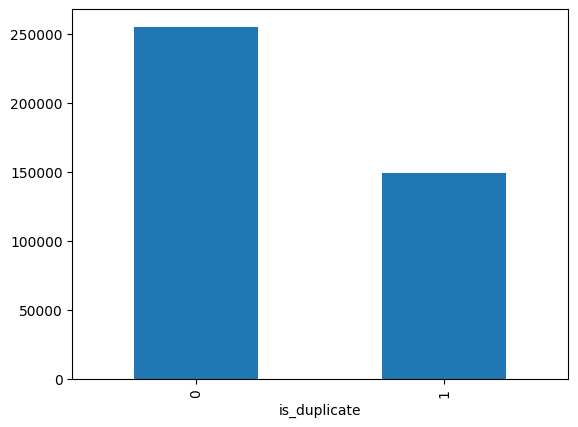

In [13]:
print(df['is_duplicate'].value_counts().plot(kind='bar'))

# **rpt q **

In [15]:
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [16]:
print('Number of unique questions ',np.unique(qid).shape[0])

Number of unique questions  789801


In [17]:
x=qid.value_counts()>1
print('Number of questions getting repeated ',x[x].shape[0])

Number of questions getting repeated  13698


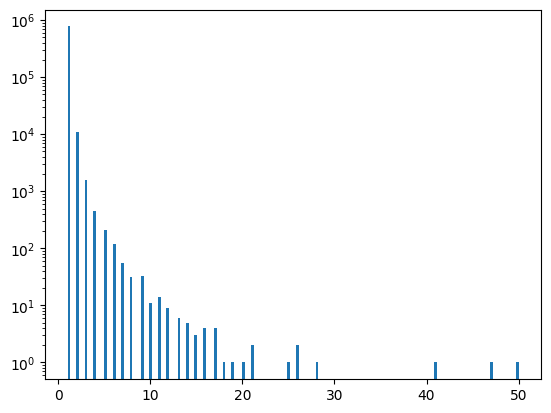

In [19]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [20]:
new_df=df.sample(30000,random_state=2)


In [22]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


# **only q rakhbo bakita bad dibo**

In [23]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [26]:
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)# 3k+3k->6k  te convert korlo

In [28]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape  #3k bow ache q1 e and 3k bow ache q2 e

(30000, 6000)

In [29]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7385

In [33]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.729

at first without any kind of preprocessing apply feature_engi